In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load the dataset
df = pd.read_csv(r"C:\Users\RUTH\Downloads\Attachment -Mwanco Magnate\Mwanco Magnate Cybercafe.csv")

# Preview first 5 rows
df.head()

,Date,Time,DayOfWeek,WeekNumber,Month,Service,Duration_Minutes,Pages,Quantity,Rate_Per_Hour,Unit_Price,Total_Amount,Payment_Method
0,2025-06-02,08:06,Monday,1,June,Scanning,NaN,13.0,NaN,NaN,5.0,65.00,Mpesa
1,2025-06-02,08:25,Monday,1,June,Gaming,85.0,NaN,NaN,50.0,NaN,70.83,Cash
2,2025-06-02,08:27,Monday,1,June,Exercise Book Sale,NaN,NaN,5.0,NaN,50.0,250.00,Mpesa
3,2025-06-02,08:30,Monday,1,June,Browsing,33.0,NaN,NaN,40.0,NaN,22.00,Cash
4,2025-06-02,08:46,Monday,1,June,Gaming,73.0,NaN,NaN,60.0,NaN,73.00,Mpesa


In [9]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              303 non-null    datetime64[ns]
 1   Time              303 non-null    object        
 2   DayOfWeek         303 non-null    object        
 3   WeekNumber        303 non-null    int64         
 4   Month             303 non-null    object        
 5   Service           303 non-null    object        
 6   Duration_Minutes  47 non-null     float64       
 7   Pages             68 non-null     float64       
 8   Quantity          188 non-null    float64       
 9   Rate_Per_Hour     47 non-null     float64       
 10  Unit_Price        256 non-null    float64       
 11  Total_Amount      303 non-null    float64       
 12  Payment_Method    303 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 30.9+ KB


In [11]:
# Check for missing values
df.isnull().sum()

Date                  0
Time                  0
DayOfWeek             0
WeekNumber            0
Month                 0
Service               0
Duration_Minutes    256
Pages               235
Quantity            115
Rate_Per_Hour       256
Unit_Price           47
Total_Amount          0
Payment_Method        0
dtype: int64

In [13]:
# Summary statistics
df.describe(include='all')

,Date,Time,DayOfWeek,WeekNumber,Month,Service,Duration_Minutes,Pages,Quantity,Rate_Per_Hour,Unit_Price,Total_Amount,Payment_Method
count,303,303,303,303.000000,303,303,47.000000,68.000000,188.000000,47.000000,256.000000,303.000000,303
unique,NaN,255,5,NaN,2,13,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,09:57,Thursday,NaN,June,Scanning,NaN,NaN,NaN,NaN,NaN,NaN,Mpesa
freq,NaN,3,66,NaN,212,29,NaN,NaN,NaN,NaN,NaN,NaN,196
mean,2025-06-20 14:20:11.881188096,NaN,NaN,3.369637,NaN,NaN,92.978723,14.264706,7.335106,54.255319,80.699219,220.191947,NaN
min,2025-06-02 00:00:00,NaN,NaN,1.000000,NaN,NaN,19.000000,1.000000,1.000000,40.000000,3.000000,7.000000,NaN
25%,2025-06-09 12:00:00,NaN,NaN,2.000000,NaN,NaN,46.000000,8.000000,2.000000,45.000000,7.000000,69.335000,NaN
50%,2025-06-19 00:00:00,NaN,NaN,3.000000,NaN,NaN,86.000000,13.500000,4.000000,50.000000,20.000000,140.000000,NaN
75%,2025-07-02 00:00:00,NaN,NaN,5.000000,NaN,NaN,136.000000,19.000000,7.000000,60.000000,80.000000,250.000000,NaN
max,2025-07-11 00:00:00,NaN,NaN,6.000000,NaN,NaN,176.000000,38.000000,48.000000,70.000000,550.000000,1650.000000,NaN


In [15]:
# Most frequent services
df['Service'].value_counts()

Service
Scanning              29
Browsing              26
Paper Ream Sale       26
Photocopy             25
Envelope Sale         25
Ruler Sale            25
Spiral Binding        25
Lamination            25
Exercise Book Sale    23
Gaming                21
Pen Sale              20
Typing                19
Printing              14
Name: count, dtype: int64

In [17]:
# Payment method distribution
df['Payment_Method'].value_counts()

Payment_Method
Mpesa    196
Cash     107
Name: count, dtype: int64

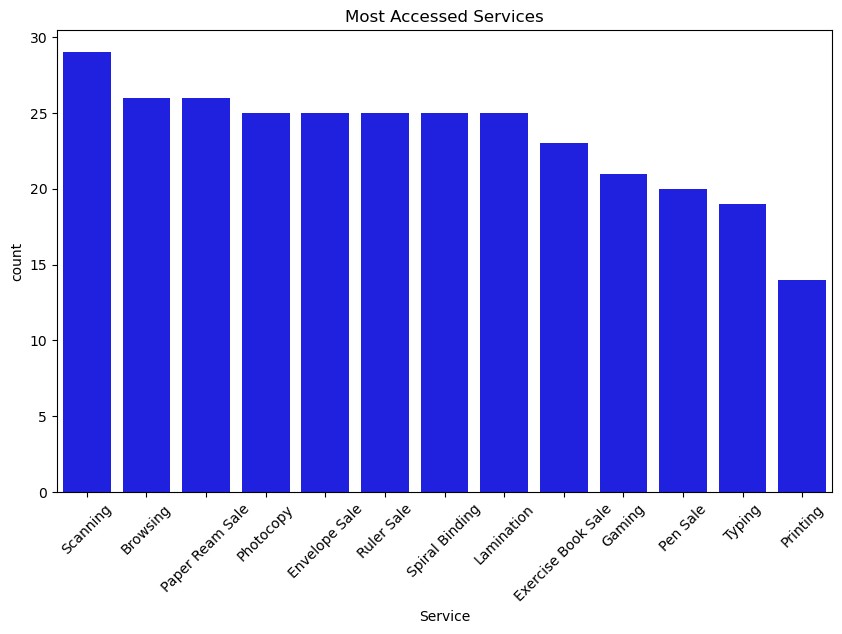

In [25]:
#Visualize most accessed services
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Service', color = "blue", order=df['Service'].value_counts().index)
plt.title("Most Accessed Services")
plt.xticks(rotation=45)
plt.show()


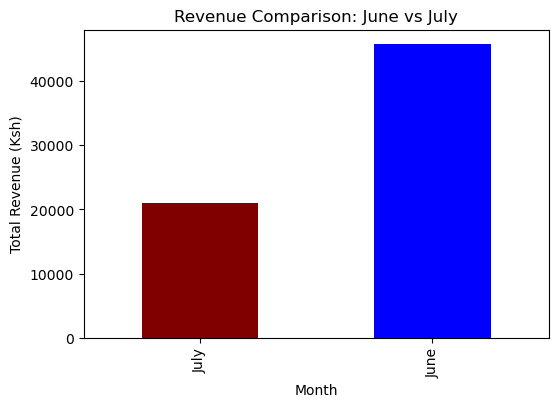

In [62]:
# June vs July Revenue
monthly_revenue = df.groupby('Month')['Total_Amount'].sum()

plt.figure(figsize=(6,4))
monthly_revenue.plot(kind='bar', color=['maroon','blue'])
plt.title("Revenue Comparison: June vs July")
plt.ylabel("Total Revenue (Ksh)")
plt.show()


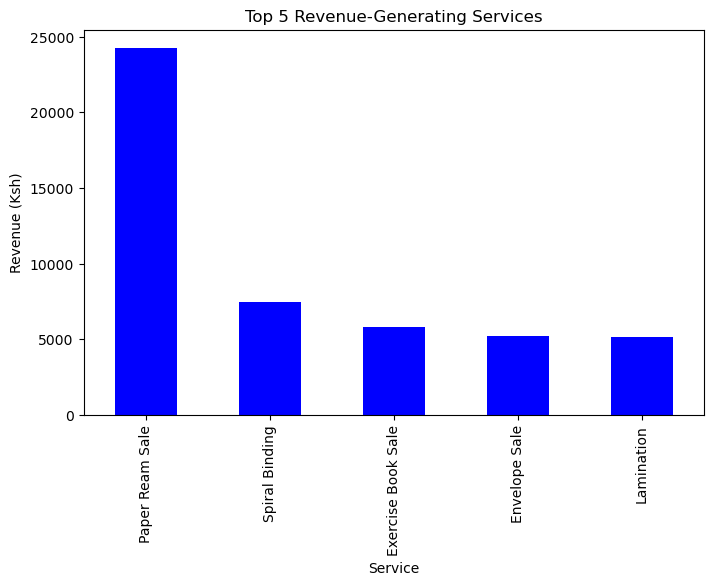

In [21]:
service_revenue = df.groupby('Service')['Total_Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
service_revenue.plot(kind='bar', color = 'blue')
plt.title("Top 5 Revenue-Generating Services")
plt.ylabel("Revenue (Ksh)")
plt.show()

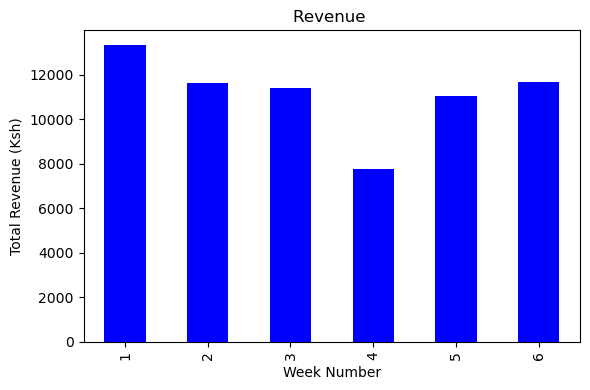

In [23]:
weekly_revenue = df.groupby('WeekNumber')['Total_Amount'].sum()
plt.figure(figsize=(6,4))
weekly_revenue.plot(kind='bar', color='blue')
plt.title("Revenue ")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue (Ksh)")
plt.tight_layout()
plt.show()

   WeekNumber  Total_Amount
0           1      13317.16
1           2      11600.66
2           3      11382.34
3           4       7747.66
4           5      11018.84
5           6      11651.50


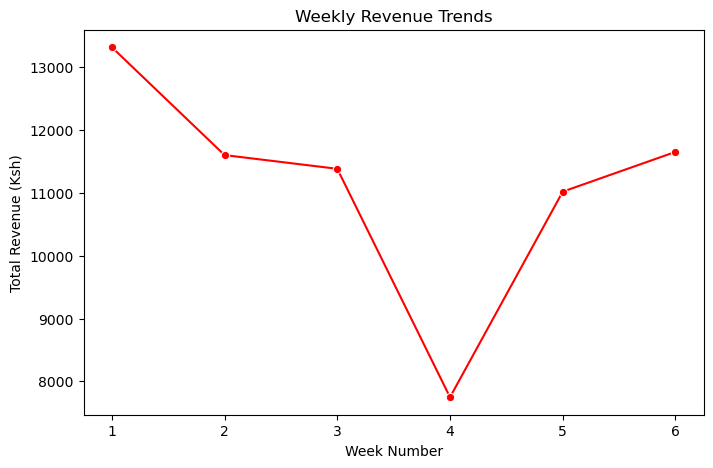

In [52]:
# Group revenue by WeekNumber
weekly_revenue = df.groupby('WeekNumber')['Total_Amount'].sum().reset_index()

# Preview
print(weekly_revenue)

# Plot weekly revenue
plt.figure(figsize=(8,5))
sns.lineplot(data=weekly_revenue, x='WeekNumber', y='Total_Amount', marker='o', color = "red")
plt.title("Weekly Revenue Trends")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue (Ksh)")
plt.show()


# Summary of Key Findings

1**Scanning servi** was the most accessed service.  
 ulyune  ahlowerher revenue compared JuneM.**  . **Selling of paper am** was the biggest contributor to total revenue.  
4.he **weekly trend art** showed a significant revenue decreasin **Wk 4**.  

### Conclusion
The data shows that Scanning and Paper Ream Sales are critical revenue drivers.  
However, the decline in Week 4 highlights possible demand fluctuations or operational challenges.  
This insight can help management adjust staffing or promotions to stabilize performance.